Text(-80,-20,'[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]')

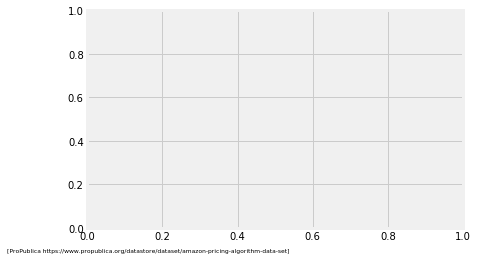

In [318]:
import matplotlib.pyplot as plt

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', (0,0),
             (-80,-20), fontsize=6, xycoords='axes fraction', textcoords='offset points', va='top')

<a id="Legend"></a>
### Legend

- 250 bestselling products over several weeks
- For items that were listed without a shipping price, they were added to the shopping cart and proceeded to checkout where the shipping price was displayed 
- All of the items that lacked a shipping price were sold by Amazon or sellers in the “Fulfilled by Amazon” program
- Once shipping prices were compiled for all vendors, the price was re-calculated to combine price plus shipping for each item and re-ranked the items as they would have been ranked if shipping was included for all items
- For all products, sales tax was excluded from the analysis

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
url = './data/09-19-Amazon-Ranking-Analysis.csv'

In [91]:
amazon = pd.read_csv(url, parse_dates = True, index_col='ScrapeDate')

In [92]:
amazon.head(10)

,Index,ProductName,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
ScrapeDate,,,,,,,,,,,,,
2016-06-14,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2016-06-14,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2016-06-27,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,5,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",11,9,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,6,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",5,3,2,6.50,6.50,"Uritox, LLC",Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,7,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6,4,3,7.99,7.99,mynewwhip,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
2016-06-27,8,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",7,5,4,8.49,8.49,ChopShopDeals,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [93]:
amazon.tail(10)

,Index,ProductName,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
ScrapeDate,,,,,,,,,,,,,
2016-08-30,6963,myBaby SoundSpa Portable,6,6,5,28.36,28.36,Happy Haus,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6964,myBaby SoundSpa Portable,7,7,6,31.11,31.11,MINDeyes,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6965,myBaby SoundSpa Portable,5,5,7,25.20,31.98,Serenity Health & Home Decor,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6966,myBaby SoundSpa Portable,9,9,8,32.89,32.89,Aurora Store19,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6967,myBaby SoundSpa Portable,10,10,9,33.72,33.72,Tropicaltyphoonllc,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6968,myBaby SoundSpa Portable,11,11,10,34.14,34.14,AMAZIN',Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6969,myBaby SoundSpa Portable,12,12,11,34.98,34.98,Happy Titan,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6970,myBaby SoundSpa Portable,13,13,12,35.00,35.00,DDN INC,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
2016-08-30,6971,myBaby SoundSpa Portable,8,8,13,31.95,38.73,Marilyn's Galleria,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77


Number of rows and columns

In [94]:
amazon.shape

(6973, 13)

6,973 vendor listings in total 

Types of data in columns

In [95]:
amazon.dtypes

Index                       int64
ProductName                object
ScrapedIndex                int64
ScrapedIndexTrueRank        int64
CorrectedIndexTrueRank      int64
ScrapedIndexPrice         float64
CorrectedPrice            float64
ScrapedIndexVendor         object
ScrapedIndexVendorType     object
BBScrapedPrice            float64
BBVendorType               object
BBVendor                   object
BBCorrectedPrice          float64
dtype: object

Column labels

In [96]:
amazon.columns

Index(['Index', 'ProductName', 'ScrapedIndex', 'ScrapedIndexTrueRank',
       'CorrectedIndexTrueRank', 'ScrapedIndexPrice', 'CorrectedPrice',
       'ScrapedIndexVendor', 'ScrapedIndexVendorType', 'BBScrapedPrice',
       'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

In [133]:
amazon.drop(['ScrapedIndex', 'fulfillment_by_amazon','not_FBA'], inplace=True)

In [134]:
amazon.rename(columns={'ProductName':'Product', 'ScrapedIndexTrueRank':'Initial_Rank',
                       'CorrectedIndexTrueRank': 'True_Rank', 'ScrapedIndexPrice' : 'Initial_Price',
                       'CorrectedPrice':'True_Price', 'ScrapedIndexVendor':'Vendor',
                       'ScrapedIndexVendorType': 'Initial_Vendor_Type', 'BBScrapedPrice':'Initial_Vendor_Price',
                       'BBVendorType':'Vendor_Type', 'BBVendor':'Vendor_Shipment', 'BBCorrectedPrice' : 
                       'Vendor_True_Price'}, inplace =True)

In [135]:
amazon.columns

Index(['Index', 'Product', 'ScrapedIndex', 'Initial_Rank', 'True_Rank',
       'Initial_Price', 'True_Price', 'Vendor', 'Initial_Vendor_Type',
       'Initial_Vendor_Price', 'Vendor_Type', 'Vendor_Shipment',
       'Vendor_True_Price'],
      dtype='object')

Checking for missing data

In [136]:
amazon.isnull().sum()

Index                   0
Product                 0
ScrapedIndex            0
Initial_Rank            0
True_Rank               0
Initial_Price           0
True_Price              0
Vendor                  0
Initial_Vendor_Type     0
Initial_Vendor_Price    0
Vendor_Type             0
Vendor_Shipment         0
Vendor_True_Price       0
dtype: int64

Data is relatively clean; missing various vendors

In [101]:
amazon['Vendor_Shipment'].replace(np.nan, 'Missing', inplace=True)

In [102]:
amazon.isnull().sum()

Index                   0
Product                 0
ScrapedIndex            0
Initial_Rank            0
True_Rank               0
Initial_Price           0
True_Price              0
Vendor                  0
Initial_Vendor_Type     0
Initial_Vendor_Price    0
Vendor_Type             0
Vendor_Shipment         0
Vendor_True_Price       0
dtype: int64

<a id='True Rank Versus Initial Rank'></a>
### True Rank Versus Initial Rank

- Once shipping prices were compiled for all vendors, the price was re-calculated to combine price plus shipping for each item and re-ranked the items as they would have been ranked if shipping was included for all items

**Hypothesis**: Amazon products were ranked higher for the Initial Rank

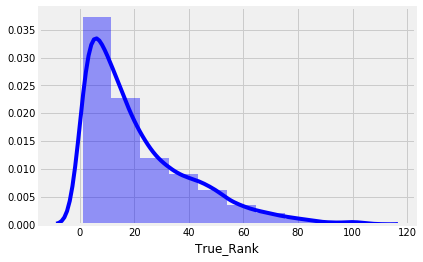

In [103]:
True_Rank = amazon.loc[:, 'True_Rank']
sns.distplot(True_Rank, bins=10, color='b');

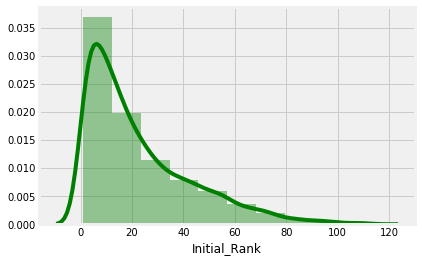

In [104]:
Initial_Rank = amazon.loc[:, 'Initial_Rank']
sns.distplot(Initial_Rank, bins=10, color='g');

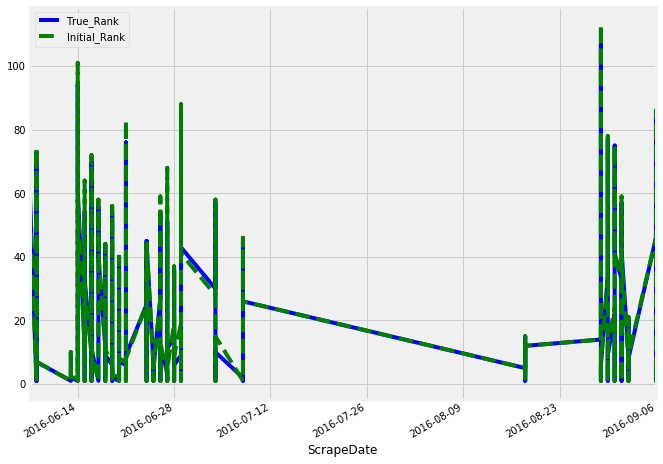

In [132]:
amazon.loc[:, ('True_Rank', 'Initial_Rank')].plot(figsize=(10,8), 
                                                  style={'True_Rank': 'b', 'Initial_Rank': '--g'});

In [116]:
amazon.Vendor_Type.unique()

array(['FBA', 'Other', 'Amazon'], dtype=object)

In [113]:
Vendor_Type_O_replace = {'Amazon':'Amazon','O':'Other','FBA':'FBA'}
amazon['Vendor_Type'].replace(Vendor_Type_O_replace, inplace = True)

/Users/ginaadduci/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


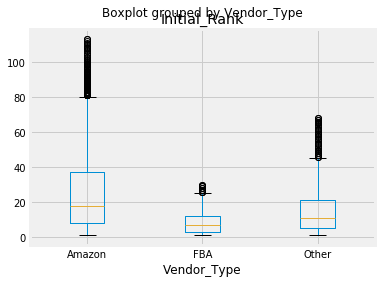

In [114]:
amazon.boxplot('Initial_Rank', 'Vendor_Type');

/Users/ginaadduci/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


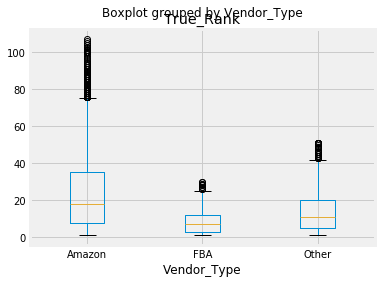

In [115]:
amazon.boxplot('True_Rank', 'Vendor_Type');

In [68]:
amazon.True_Rank.mean()

21.559300157751327

In [69]:
amazon.Initial_Rank.mean()

22.730962283091927

<a id='True Price Initial Price'></a>
### True Price Versus Initial Price

- Once shipping prices were compiled for all vendors, the price was re-calculated to combine price plus shipping for each item and re-ranked the items as they would have been ranked if shipping was included for all items

**Hypothesis**: Amazon products were cheaper for the Initial Price

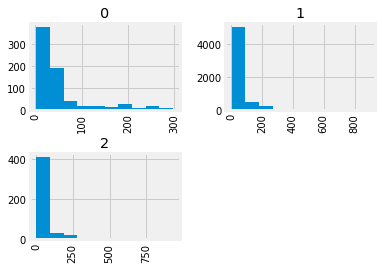

In [327]:
amazon.hist('Initial_Price', 'Vendor_Type');

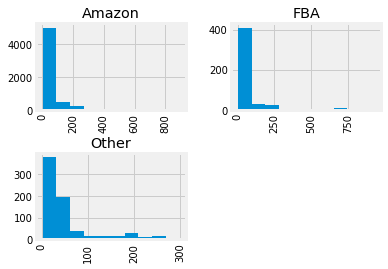

In [123]:
amazon.hist('True_Price', 'Vendor_Type');

In [119]:
amazon.True_Price.mean()

55.56763086189539

In [120]:
amazon.Initial_Price.mean()

54.90489602753425

<a id='Understanding the Data'></a>
### Understanding the Data 

**Additional Data Pulls**

In [231]:
amazon.loc[:, 'Product'].value_counts()

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                                                                                                               154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                                                                                                               115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                                                                                                          106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                                                                                                                      95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                                                                                            

In [147]:
amazon.Vendor_Shipment.unique()

array(['Sold by Sharp Nutrition and Fulfilled by Amazon.',
       'Sold by Michael Minyety and Fulfilled by Amazon.', 'Missing',
       'Ships from and sold by Happy DRH.',
       'Ships from and sold by Solutions Pest & Lawn.',
       'Ships from and sold by Amazon.com.',
       'Ships from and sold by Adams Brown Company.',
       'Ships from and sold by Amazon.com in easy-to-open packaging.',
       'Ships from and sold by Cell Emporium.',
       'Sold by Art Naturals and Fulfilled by Amazon.',
       'Sold by LuckyLuckyLucky and Fulfilled by Amazon.',
       'Sold by Radha Beauty Products and Fulfilled by Amazon.',
       'Ships from and sold by PORTABLE GUY.',
       'Ships from and sold by Focus Camera.',
       'Ships from and sold by Brookstone.',
       'Sold by Finelane, USA and Fulfilled by Amazon.',
       'Sold by dizzy deals and Fulfilled by Amazon.',
       'Sold by Cabinet Hardware 4 Less and Fulfilled by Amazon.',
       'Sold by TabletExpress and Fulfilled by Amazon.'

In [151]:
Vendor_Shipment_Uniques = pd.value_counts(amazon['Vendor_Shipment'].values)
Vendor_Shipment_Uniques

Ships from and sold by Amazon.com.                                      5293
Ships from and sold by Amazon.com in easy-to-open packaging.             495
Missing                                                                  164
Ships from and sold by El Garaje.                                         86
Ships from and sold by PORTABLE GUY.                                      46
Ships from and sold by ShopChanute.                                       44
Ships from and sold by HE TAO.                                            39
Sold by Beauty Base and Fulfilled by Amazon.                              39
Sold by CHENGFENGPOLANG and Fulfilled by Amazon.                          32
Sold by XoomBot and Fulfilled by Amazon.                                  32
Ships from and sold by Gatzies.                                           28
Sold by Deals On Call and Fulfilled by Amazon.                            26
Ships from and sold by Imagine Toys!.                                     26

In [140]:
amazon.Product.unique()

array([ '#1 BEST Probiotic Supplement - 60 Day Supply with 100% Moneyback Guarantee - Improve Digestion, Bowel Regularity, & Increase Energy with the Most Potent Probiotic...',
       '10 Panel Dip Drug Testing Kit, Test for 10 Different Drugs. (1)',
       '2wayz FULL METAL BODY Garden Hose Splitter | Y Ball Valve Connector for Your Soaker Hose, outdoor faucet, sprinkler & drip irrigation systems. Includes: 10 Rubber Washers + 3 Years Guarantee. Enjoy!',
       '3 Pair Motorcycle Riding Glasses Smoke Clear Yellow',
       '3/4 gal Talstar Pro / One Multi Use Pest Control Insecticide (96 ounce jug)',
       '303 (30306) Protectant Trigger Sprayer, 32 fl. Oz',
       '303 (30313-CSR) Aerospace Protectant Trigger Sprayer, 32 Fl. oz.',
       '303 (30606) Fabric Guard Trigger Sprayer, 32 fl. oz.',
       '3M Utility Duct Tape 2929 Silver, 1.88 in x 50 yd 5.8 mils (Pack of 1)',
       '3M Virtua CCS Protective Eyewear 11872-00000-20, Foam Gasket, Anti Fog Lens, Clear',
       '4-Drawer Sto

In [143]:
amazon.Vendor.unique()

array(['Supplement Warriors', 'Sharp Nutrition', 'speedy tests', ...,
       'Serenity Health & Home Decor', 'Tropicaltyphoonllc',
       "Marilyn's Galleria"], dtype=object)

In [153]:
amazon.columns

Index(['Index', 'Product', 'ScrapedIndex', 'Initial_Rank', 'True_Rank',
       'Initial_Price', 'True_Price', 'Vendor', 'Initial_Vendor_Type',
       'Initial_Vendor_Price', 'Vendor_Type', 'Vendor_Shipment',
       'Vendor_True_Price'],
      dtype='object')

In [189]:
Demo = ['Vendor_Type', 'True_Rank', 'Initial_Rank']

amazon_demo = amazon.sort_values('Vendor_Type', ascending = True)
amazon_demo.groupby('Vendor_Type').head(10)[Demo]

,Vendor_Type,True_Rank,Initial_Rank
ScrapeDate,,,
2016-08-30,Amazon,14,14
2016-06-15,Amazon,51,45
2016-06-15,Amazon,50,44
2016-06-15,Amazon,49,43
2016-06-15,Amazon,48,63
2016-06-15,Amazon,47,58
2016-06-15,Amazon,46,42
2016-06-15,Amazon,45,57
2016-06-15,Amazon,44,41


In [227]:
Demo = ['Vendor_Type', 'True_Rank', 'True_Price']

amazon_demo = amazon.sort_values('True_Price', ascending = True)
amazon_demo.groupby('True_Price').head(10)[Demo]

,Vendor_Type,True_Rank,True_Price
ScrapeDate,,,
2016-08-29,0,1,2.38
2016-09-02,1,1,2.48
2016-08-29,0,2,2.50
2016-08-29,0,2,2.50
2016-06-27,0,1,2.57
2016-06-27,0,2,2.59
2016-06-27,0,2,2.59
2016-08-29,0,3,2.70
2016-08-29,0,4,2.93


<a id="Data Analysis"></a>
### Data Analysis

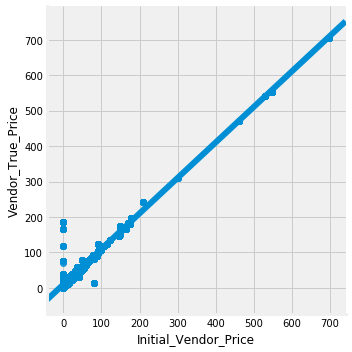

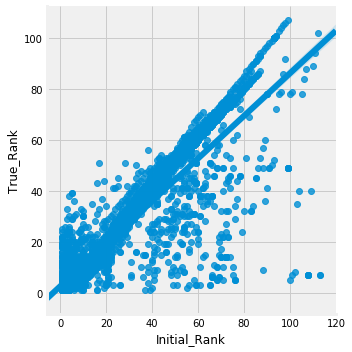

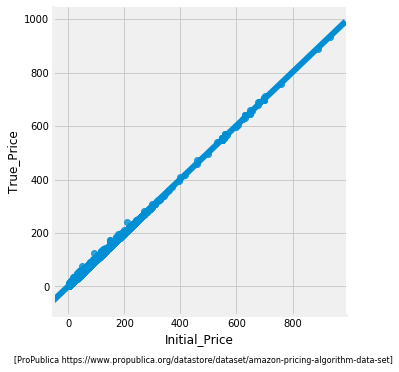

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='Initial_Vendor_Price', y='Vendor_True_Price', data=amazon)
plt.show()
sns.lmplot(x='Initial_Rank', y='True_Rank', data=amazon)
plt.show()
sns.lmplot(x='Initial_Price', y='True_Price', data=amazon);

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1),
(-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

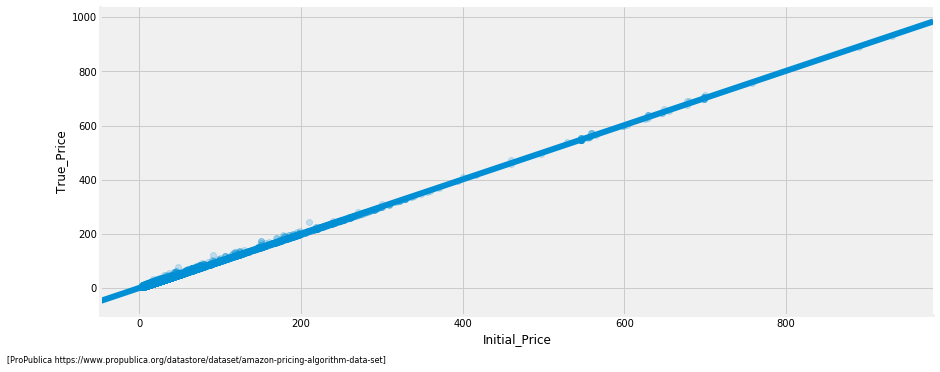

In [322]:
sns.lmplot(x = 'Initial_Price', 
           y = 'True_Price', 
           data = amazon,
           aspect = 2.5,
           scatter_kws = {'alpha' : 0.2}
          );
plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

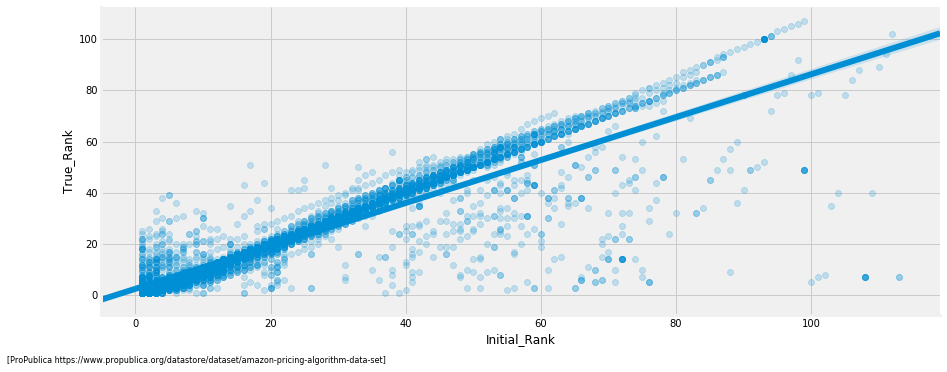

In [323]:
sns.lmplot(x = 'Initial_Rank', 
           y = 'True_Rank', 
           data = amazon,
           aspect = 2.5,
           scatter_kws = {'alpha' : 0.2}
          );

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

<a id="Linear Regression Analysis"></a>
### Linear Regression Analysis

In [228]:
amazon.columns

Index(['Index', 'Product', 'ScrapedIndex', 'Initial_Rank', 'True_Rank',
       'Initial_Price', 'True_Price', 'Vendor', 'Initial_Vendor_Type',
       'Initial_Vendor_Price', 'Vendor_Type', 'Vendor_Shipment',
       'Vendor_True_Price', 'prediction'],
      dtype='object')

In [245]:
amazon.dtypes

Index                     int64
Product                  object
ScrapedIndex              int64
Initial_Rank              int64
True_Rank                 int64
Initial_Price           float64
True_Price              float64
Vendor                   object
Initial_Vendor_Type      object
Initial_Vendor_Price    float64
Vendor_Type              object
Vendor_Shipment          object
Vendor_True_Price       float64
prediction              float64
dtype: object

In [260]:
Vendor_Type_Replace = {'Other':'0', 'Amazon':'1', 'FBA':'2'}

amazon['Vendor_Type'].replace(Vendor_Type_Replace, inplace=True)

In [261]:
from sklearn.linear_model import LinearRegression

In [271]:
lr = LinearRegression()

X = amazon.loc[:, ['Vendor_Type']]
y = amazon.loc[:, '['Vendor_Type']']

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [272]:
amazon.loc[:, 'prediction'] = lr.predict(X)

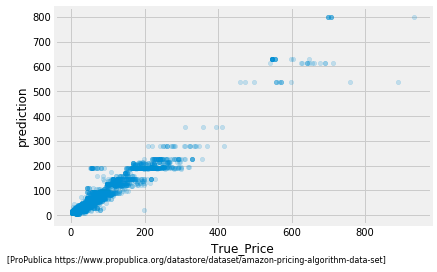

In [324]:
fig, ax = plt.subplots()
amazon.plot(kind = 'scatter', x = 'True_Price', y='prediction', ax=ax, alpha=0.2);

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');

In [287]:
lr = LinearRegression()

X = amazon.loc[:, ['Vendor_True_Price']]
y = amazon.loc[:, 'True_Price']

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [288]:
amazon.loc[:, 'prediction'] = lr.predict(X)

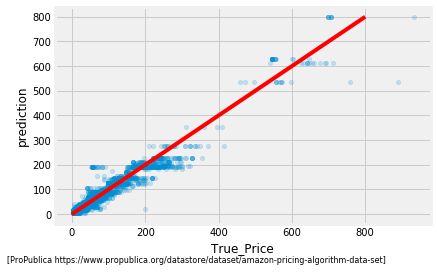

In [325]:
fig, ax = plt.subplots()
amazon.plot(kind = 'scatter', x = 'True_Price', y='prediction', ax=ax, alpha=0.2)
ax.plot([0, 800], [0, 800], 'r');

plt.annotate('[ProPublica https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set]', 
             (-0.1,-0.1), (-10,-10), fontsize=8, xycoords='axes fraction', textcoords='offset points', va='top');